In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hHuHxIVMc7XaZWAG32q3uDwSkg1Ch_MO' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1hHuHxIVMc7XaZWAG32q3uDwSkg1Ch_MO" -O 'tilled_images.zip' && rm -rf /tmp/cookies.txt

--2021-08-16 21:35:39--  https://docs.google.com/uc?export=download&confirm=fEnd&id=1hHuHxIVMc7XaZWAG32q3uDwSkg1Ch_MO
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.100, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-48-docs.googleusercontent.com/docs/securesc/39v16qtb9le1dolo2i5i710g2ff2hs1u/q0pu94u00a6sucf44tuhsljggv5h1ofg/1629149700000/13329137419290567799/17887677226770249781Z/1hHuHxIVMc7XaZWAG32q3uDwSkg1Ch_MO?e=download [following]
--2021-08-16 21:35:39--  https://doc-0g-48-docs.googleusercontent.com/docs/securesc/39v16qtb9le1dolo2i5i710g2ff2hs1u/q0pu94u00a6sucf44tuhsljggv5h1ofg/1629149700000/13329137419290567799/17887677226770249781Z/1hHuHxIVMc7XaZWAG32q3uDwSkg1Ch_MO?e=download
Resolving doc-0g-48-docs.googleusercontent.com (doc-0g-48-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting

In [6]:
!unzip -q tilled_images.zip

In [16]:
!rm -rf {train_imgs,test_imgs}/

In [17]:
!mkdir -p {train_imgs,test_imgs}/{inputs,outputs} 

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [19]:
img_size = 512

In [20]:
i=0
for filename in sorted(os.listdir('../tilled_images/images/nolabel')):
    if not filename.startswith('.'):  
        img_label = cv2.imread(os.path.join('../TNT Masks/TNT Masks '+ filename[7:-3]+'png'),cv2.IMREAD_UNCHANGED)

        img = cv2.imread(os.path.join('../tilled_images/images/nolabel/',filename))

        img_label_output = img_label

        h,w,c = img.shape

        width = img_size
        height = img_size

        corner = 60
        slide_px = 40

        slidew_num = (w-width)//slide_px + 1
        slideh_num = (h-height)//slide_px + 1

        for slw in range(slidew_num):
            for slh in range(slideh_num):
                if ((slw+1)<slidew_num):
                    slidew = slw*slide_px
                else:
                    slidew = w-width

                if ((slh+1)<slideh_num):
                    slideh = slh*slide_px
                else:
                    slideh = h-height

                imgbox_label     = img_label[slideh:slideh+height,slidew:slidew+width]
                imgbox_label_mid = img_label[slideh+corner:slideh+height-corner,slidew+corner:slidew+width-corner]
                imgbox           = img[slideh:slideh+height,slidew:slidew+width]
                #imgbox       = cv2.resize(imgbox,(img_size,img_size))
                #imgbox_label       = cv2.resize(imgbox_label,(img_size,img_size))

                ind_mid = np.where(imgbox_label_mid!=0) # checking if labels are in center
                ind = np.where(imgbox_label!=0) # checking if labels are in box
                
                if (len(ind_mid[0])>20):
                    classname = '_1'
                    cv2.imwrite('./train_imgs/inputs/'+filename[:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+classname+'.png', imgbox)
                elif (len(ind[0])<1):
                    classname = '_0'
                    cv2.imwrite('./train_imgs/inputs/'+filename[:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+classname+'.png', imgbox)
                #elif i<5:
                    #cv2.imwrite('./test_imgs/inputs/'+filename[:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+classname+'.png', imgbox)
                    
        i=i+1

In [21]:
pathimage = './train_imgs/inputs/'

pathimage_test = './test_img/inputs/'

In [22]:
import random
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import pandas as pd


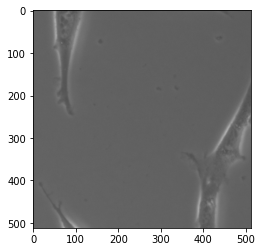

In [23]:
filenames = sorted(os.listdir(pathimage))
sample = random.choice(filenames)
image = load_img(pathimage+sample)
plt.imshow(image)

In [24]:
filenames[1:4]

['Tiling 1slidew0slideh1000_0.png',
 'Tiling 1slidew0slideh1040_0.png',
 'Tiling 1slidew0slideh1080_0.png']

In [25]:
filenames[5].split('_')

['Tiling 1slidew0slideh1160', '0.png']

In [26]:
filenames = sorted(os.listdir(pathimage))
categories = []
treat=['Samp1','Samp2','Samp3']
for filename in filenames:
    
    category = filename.split('_')[1]
    if category=='1.png':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [27]:
print('shape: ',df.shape)
df.head()

shape:  (13735, 2)


,filename,category
0,Tiling 1slidew0slideh0_0.png,0
1,Tiling 1slidew0slideh1000_0.png,0
2,Tiling 1slidew0slideh1040_0.png,0
3,Tiling 1slidew0slideh1080_0.png,0
4,Tiling 1slidew0slideh1120_0.png,0


<AxesSubplot:>

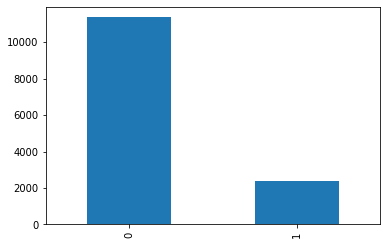

In [28]:
df['category'].value_counts().plot.bar()

In [29]:
width, height = image.size
FAST_RUN = False
IMAGE_WIDTH=width
IMAGE_HEIGHT=height
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [30]:
from keras.applications import VGG16

base_model = VGG16( weights = 'imagenet', include_top = False, input_shape = (height,width,3) )

58892288/58889256 [==============================] - 0s 0us/step


In [31]:
from keras.layers     import *
from keras.models     import *
from keras.optimizers import *
from keras.callbacks  import ModelCheckpoint
from keras.metrics import *

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [32]:
x = base_model.output   # last output layer after removing the top layers basically 8x8x512
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)

x = Dropout(0.6)(x)
x = Dense(170,activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(70,activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [33]:
# ---------------
# Freeze lower layers
# ---------------
for layer in base_model.layers: 
    layer.trainable = False

In [34]:
df["category"] = df["category"].replace({0: 'cont', 1: 'treat'}) 

In [35]:
train_df, test_df = train_test_split(df, test_size=0.20,stratify=df["category"], random_state=42)
train_df, validate_df = train_test_split(train_df, test_size=0.25,stratify=train_df["category"], random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [36]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
total_test = test_df.shape[0]
batch_size=32

In [37]:
model.compile( loss      = 'categorical_crossentropy',
               optimizer = Adam(lr=5e-4),
               #metrics=[Precision(),'acc'])
               metrics   = ['acc'])

In [38]:
# ---------------
# transformation
# ---------------
train_datagen = ImageDataGenerator(
    #rotation_range=15,
    rescale=1./255,
    #shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    #width_shift_range=0.1,
    #height_shift_range=0.1
)


validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# ---------------
# generations
# ---------------
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)


validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)



Found 8241 validated image filenames belonging to 2 classes.
Found 2747 validated image filenames belonging to 2 classes.
Found 2747 validated image filenames belonging to 2 classes.


In [69]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


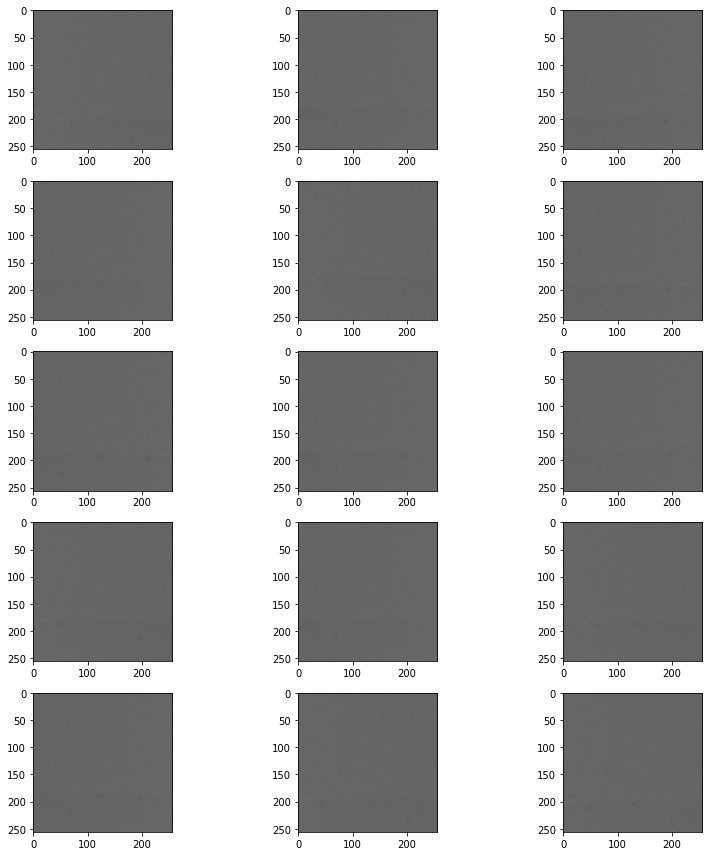

In [70]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=50 #if FAST_RUN else 200
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    batch_size=batch_size
    #callbacks=callbacks
)

Epoch 1/50
257/257 [==============================] - 512s 2s/step - loss: 0.5044 - acc: 0.8090 - val_loss: 0.4405 - val_acc: 0.8287
Epoch 2/50
257/257 [==============================] - 464s 2s/step - loss: 0.4672 - acc: 0.8214 - val_loss: 0.4124 - val_acc: 0.8287
Epoch 3/50
  4/257 [..............................] - ETA: 6:59 - loss: 0.3277 - acc: 0.8678

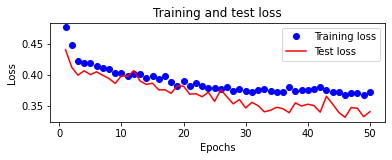

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


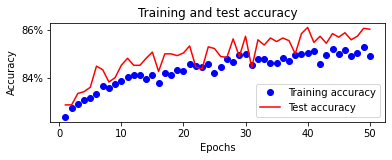

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
model.save('tilled_model_256_new.h5')

In [35]:
model2 = load_model('tilled_model_256_new2.h5')

In [28]:
for layer in model.layers: 
    layer.trainable = True
model.compile( loss      = 'categorical_crossentropy',
               optimizer = Adam(lr=5e-6),
               #metrics=[Precision(),'acc'])
               metrics   = ['acc'])

In [29]:
epochs=20 #if FAST_RUN else 200
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    batch_size=16
    #callbacks=callbacks
)

Epoch 1/20
135/135 [==============================] - 65s 473ms/step - loss: 0.1946 - acc: 0.9442 - val_loss: 0.1842 - val_acc: 0.9396
Epoch 2/20
135/135 [==============================] - 63s 469ms/step - loss: 0.1852 - acc: 0.9388 - val_loss: 0.1789 - val_acc: 0.9396
Epoch 3/20
135/135 [==============================] - 63s 468ms/step - loss: 0.1738 - acc: 0.9440 - val_loss: 0.1635 - val_acc: 0.9396
Epoch 4/20
135/135 [==============================] - 63s 469ms/step - loss: 0.1748 - acc: 0.9316 - val_loss: 0.1580 - val_acc: 0.9396
Epoch 5/20
135/135 [==============================] - 64s 471ms/step - loss: 0.1765 - acc: 0.9327 - val_loss: 0.1466 - val_acc: 0.9396
Epoch 6/20
135/135 [==============================] - 63s 468ms/step - loss: 0.1452 - acc: 0.9423 - val_loss: 0.1410 - val_acc: 0.9396
Epoch 7/20
135/135 [==============================] - 64s 470ms/step - loss: 0.1462 - acc: 0.9393 - val_loss: 0.1470 - val_acc: 0.9396
Epoch 8/20
135/135 [==============================] - 6

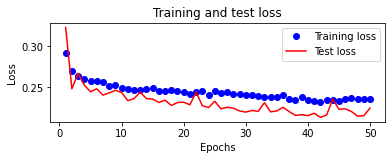

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


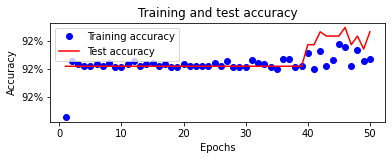

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
model.save('tilled_model_256_new2.h5')

In [41]:
test_generator.reset()

In [42]:
pred= model.predict(test_generator, total_test // batch_size)
predicted_class_indices=np.argmax(pred,axis=1)
labels=(test_generator.class_indices)
labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print(labels)
print(predictions)

[0 0 0 ... 0 1 0]
{'cont': 0, 'treat': 1}
['cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'treat', 'treat', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'treat', 'cont', 'treat', 'cont', 'cont', 'treat', 'cont', 'cont', 'cont', 'cont', 'treat', 'cont', 'cont', 'cont', 'cont', 'treat', 'cont', 'cont', 'cont', 'cont', 'treat', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'treat', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'treat', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'co

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
confusion_matrix(np.array(test_generator.classes),predicted_class_indices)

array([[2225,   47],
       [ 334,  141]])

In [45]:
print(classification_report(np.array(test_generator.classes), predicted_class_indices, target_names=labels))

              precision    recall  f1-score   support

        cont       0.87      0.98      0.92      2272
       treat       0.75      0.30      0.43       475

    accuracy                           0.86      2747
   macro avg       0.81      0.64      0.67      2747
weighted avg       0.85      0.86      0.84      2747



In [1]:
img = cv2.imread('../tilled_images/images/nolabel/Tiling 1.tif')
imglabel = cv2.imread('../tilled_images/images/nolabel/Tiling 1.tif')

h,w,c = img.shape

width = 512
height = 512

slide_px = 512

slidew_num = (w-width)//slide_px + 1

slideh_num = (h-height)//slide_px + 1

#imgout = np.ones([1,h,w])


for slw in range(slidew_num):
    for slh in range(slideh_num):

        if ((slw+1)<slidew_num):
            slidew = slw*slide_px
            
        else:
            slidew = w-width

        if ((slh+1)<slideh_num):
            slideh = slh*slide_px
        else:
            slideh = h-height

        imgbox = img[slideh:slideh+height,slidew:slidew+width]
        

        imgbox = np.expand_dims(imgbox, axis=0)
        
        #imgbox = cv2.resize(imgbox,(img_size,img_size))

        #imglabelbox = imglabel[slideh:slideh+height,slidew:slidew+width]
        #imglabelbox = cv2.resize(imglabelbox,(img_size,img_size))
        a=model.predict_on_batch(imgbox)
   
        if a.argmax(): 
            #for sboxw in range(2):
                #for sboxh in range(2):
                    #imgbox_small = img[slideh+sboxh*height//2:slideh+(sboxh+1)*height//2,slidew+sboxw*width//2:slidew+(sboxw+1)*width//2]

                    #imgbox_small = np.expand_dims(imgbox_small, axis=0)
                    
                    #b=model2.predict_on_batch(imgbox_small)
        

                    #if b.argmax(): 
                        #imglabel = cv2.rectangle(imglabel,(slidew+sboxw*width//2,slideh+sboxh*height//2),(slidew+(sboxw+1)*width//2,slideh+(sboxh+1)*height//2),(0,255,0),3)
                    
            imglabel = cv2.rectangle(imglabel,(slidew,slideh),(slidew+width,slideh+height),(0,255,0),3)
            
        #if not a.argmax(): 
            #imglabel = cv2.rectangle(imglabel,(slidew,slideh),(slidew+width,slideh+height,),(0,255,255),-1)
            
        

plt.figure(figsize=(18, 18))
plt.imshow(imglabel)
plt.show()


NameError: name 'cv2' is not defined

In [81]:
cv2.imwrite('imglabelout.png',imglabel)

True